<a href="https://colab.research.google.com/github/prajwalr96/TenserFlow_Learning/blob/master/NLP_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single Layer LSTM**

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [5]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ68A91/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ68A91/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ68A91/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
tokenizer = info.features['text'].encoder

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 69s 155ms/step - loss: 0.6005 - accuracy: 0.6625 - val_loss: 1.2407 - val_accuracy: 0.5027
Epoch 2/10
391/391 [==============================] - 60s 152ms/step - loss: 0.6175 - accuracy: 0.6573 - val_loss: 0.4392 - val_accuracy: 0.7993
Epoch 3/10
391/391 [==============================] - 60s 151ms/step - loss: 0.3862 - accuracy: 0.8426 - val_loss: 0.5219 - val_accuracy: 0.7594
Epoch 4/10
391/391 [==============================] - 60s 152ms/step - loss: 0.3763 - accuracy: 0.8494 - val_loss: 0.4663 - val_accuracy: 0.7865
Epoch 5/10
391/391 [==============================] - 60s 151ms/step - loss: 0.2787 - accuracy: 0.8946 - val_loss: 0.4629 - val_accuracy: 0.8278
Epoch 6/10
391/391 [==============================] - 61s 154ms/step - loss: 0.2309 - accuracy: 0.9160 - val_loss: 0.4504 - val_accuracy: 0.8269
Epoch 7/10
391/391 [==============================] - 60s 153ms/step - loss: 0.1786 - accuracy: 0.9374 - val_loss: 0.4716 - val_ac

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

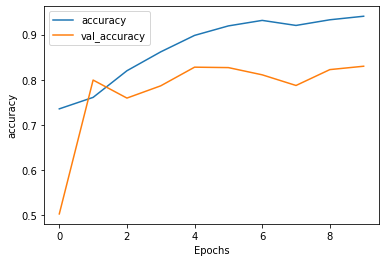

In [13]:
plot_graphs(history, 'accuracy')

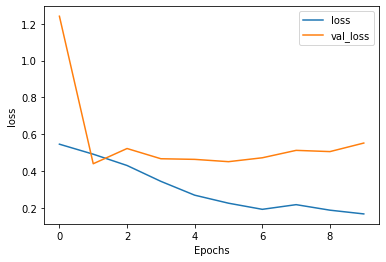

In [14]:
plot_graphs(history, 'loss')

# **Multiple Layer LSTM**

In [24]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [25]:
tokenizer = info.features['text'].encoder

In [26]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 114s 279ms/step - loss: 0.6503 - accuracy: 0.5982 - val_loss: 0.6393 - val_accuracy: 0.6414
Epoch 2/10
391/391 [==============================] - 108s 275ms/step - loss: 0.5786 - accuracy: 0.7004 - val_loss: 0.7534 - val_accuracy: 0.5803
Epoch 3/10
391/391 [==============================] - 108s 275ms/step - loss: 0.4191 - accuracy: 0.8147 - val_loss: 0.3948 - val_accuracy: 0.8479
Epoch 4/10
391/391 [==============================] - 109s 277ms/step - loss: 0.2566 - accuracy: 0.9032 - val_loss: 0.3077 - val_accuracy: 0.8743
Epoch 5/10
391/391 [==============================] - 109s 278ms/step - loss: 0.2725 - accuracy: 0.8917 - val_loss: 0.4153 - val_accuracy: 0.8296
Epoch 6/10
391/391 [==============================] - 109s 278ms/step - loss: 0.3363 - accuracy: 0.8596 - val_loss: 0.4251 - val_accuracy: 0.8186
Epoch 7/10
391/391 [==============================] - 108s 276ms/step - loss: 0.2930 - accuracy: 0.8846 - val_loss: 0.4168 -

In [31]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

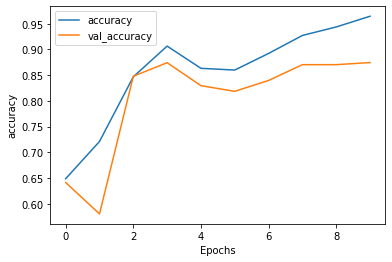

In [32]:
plot_graphs(history, 'accuracy')

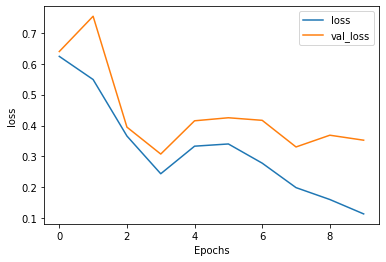

In [33]:
plot_graphs(history, 'loss')